In [ ]:
"""
作者：杨佳瑶
学号：1120193572
班级：07111908
日期：2023/5/23
GitHub：https://github.com/CCChengYi/data-mining
"""

In [31]:

import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import nltk
import seaborn as sns

## 查看数据整体信息

In [98]:
path = "./data/smsspamcollection/smsspamcollection"
# data = pd.read_csv(path, header=None, sep='\s+',  error_bad_lines=False)
data = pd.read_table(path, sep='\t', names=['label', 'mem'],encoding="latin_1")


print(data.shape)
# 查看列属性
print("************************")
print(data.columns)

# 数据的总体状况（类型，缺失）
print("************************")
data.info()

# 检查缺失值个数
print("************************")
print(data.isnull().sum())

#查看数据
print("************************")
print(data.head())
print("************************")


(5572, 2)
************************
Index(['label', 'mem'], dtype='object')
************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   mem     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
************************
label    0
mem      0
dtype: int64
************************
  label                                                mem
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
************************


可以看出，该数据集一共有两类，其中ham和spam是邮件文本的标签，ham代表正常邮件，spam代表的是垃圾邮件。且该数据集没有缺失值。

## 数据预处理

In [103]:
data['label_num'] = data.label.map({'ham': 0, 'spam': 1})  # 0代表正常邮件，1代表垃圾邮件
print(data.head())



  label                                                mem  label_num  length
0   ham  Go until jurong point, crazy.. Available only ...          0     111
1   ham                      Ok lar... Joking wif u oni...          0      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1     155
3   ham  U dun say so early hor... U c already then say...          0      49
4   ham  Nah I don't think he goes to usf, he lives aro...          0      61


将spam与ham映射为离散化的数据信息，具体来说将spam映射为1，将ham映射为0。
将邮件的文本信息，抽取转化为数字信息。

In [104]:
data['length'] = data['mem'].apply(len)
print(data.head())

  label                                                mem  label_num  length
0   ham  Go until jurong point, crazy.. Available only ...          0     111
1   ham                      Ok lar... Joking wif u oni...          0      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1     155
3   ham  U dun say so early hor... U c already then say...          0      49
4   ham  Nah I don't think he goes to usf, he lives aro...          0      61


In [105]:
x=np.array(data['mem'])
x
print(data.shape)

(5572, 4)


In [106]:
y = np.array(data['label_num'])
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

## 模型拟合数据并预测

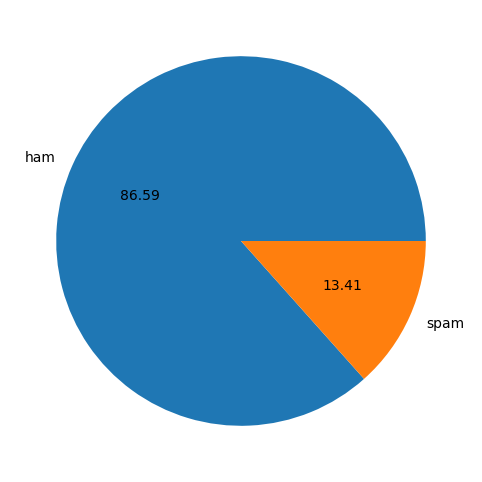

ham     4825
spam     747
Name: label, dtype: int64


In [107]:
plt.figure(figsize=(12,6))
plt.pie(data['label'].value_counts(), labels=['ham', "spam"], autopct ='%0.2f')
plt.show() 
print(data.label.value_counts())


In [108]:
spam1=data.loc[data['label']=='spam']
spam1["mem"].head()

2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: mem, dtype: object

In [109]:
ham1=data.loc[data['label']=='ham']
ham1["mem"].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: mem, dtype: object

In [110]:
x_train=np.array(data.iloc[0:500,1])
x_train.shape

(500,)

In [111]:
y_train=np.array(data.iloc[0:500,0])
y_train[0:5]

array(['ham', 'ham', 'spam', 'ham', 'ham'], dtype=object)

In [112]:
from sklearn.model_selection import train_test_split

# 划分训练集与测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
# x_train, x_test, y_train, y_test = train_test_split(data['mem'], data['label'], random_state=1)
# print('Number of rows in the total set:{}'.format(data_init.shape[0]))
# print('Number of rows in the training set:{}'.format(x_train.shape[0]))
# print('Number of rows in the test set:{}'.format(x_test.shape[0]))

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)



CountVectorizer()


### 文本特征抽取

In [114]:
train_data = count_vector.fit_transform(x_train)
test_data = count_vector.transform(x_test)

In [115]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
model.fit(train_data,y_train)

MultinomialNB()

In [116]:
pred=model.predict(test_data)
pred

model.score(test_data,y_test)

0.9874401913875598

In [117]:
from sklearn.metrics import classification_report

nbreport=classification_report(y_test, pred)
print(nbreport)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1442
           1       0.97      0.93      0.95       230

    accuracy                           0.99      1672
   macro avg       0.98      0.97      0.97      1672
weighted avg       0.99      0.99      0.99      1672



In [118]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

y=[f1_score(y_test,pred),recall_score(y_test,pred),precision_score(y_test,pred)]



In [123]:
x=["f1score","recall","precision"]
y=[f1_score(y_test,pred),recall_score(y_test,pred),precision_score(y_test,pred)]
df = pd.DataFrame(dict(x=x, y=y))
df

,x,y
0,f1score,0.953437
1,recall,0.934783
2,precision,0.972851


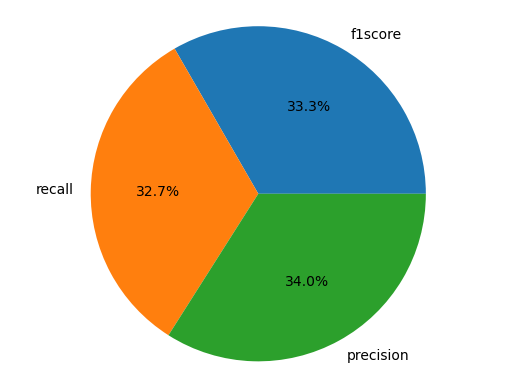

In [126]:
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.axis("equal")
plt.show()

### 构建测试集

In [129]:
#creating testing data
x_test=[ "hi how are you",
        "Free entry in 2 a wkly comp to win FA Cup fina...",
        "when will you go to home",
        "i will call you back",
        "are you busy now"]

In [131]:
x_test.append("goodmoring")
x_test.append("WINNER!! As a valued network customer you have...")

x_test

['hi how are you',
 'Free entry in 2 a wkly comp to win FA Cup fina...',
 'when will you go to home',
 'i will call you back',
 'are you busy now',
 'goodmoring',
 'WINNER!! As a valued network customer you have...',
 'goodmoring',
 'WINNER!! As a valued network customer you have...']

In [132]:
x_test1=np.array(x_test)
x_test1

array(['hi how are you',
       'Free entry in 2 a wkly comp to win FA Cup fina...',
       'when will you go to home', 'i will call you back',
       'are you busy now', 'goodmoring',
       'WINNER!! As a valued network customer you have...', 'goodmoring',
       'WINNER!! As a valued network customer you have...'], dtype='<U49')

In [137]:
X_train=data.iloc[0:200,1]
X_train[0:6]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
Name: mem, dtype: object

In [138]:
Y_train=data.iloc[0:200,0]
Y_train[0:5]

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [139]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)

CountVectorizer()


In [140]:
train_data = count_vector.fit_transform(X_train)
test_data = count_vector.transform(x_test1)

In [141]:
train_data.shape

(200, 1166)

In [144]:
test_data.shape

(9, 1166)